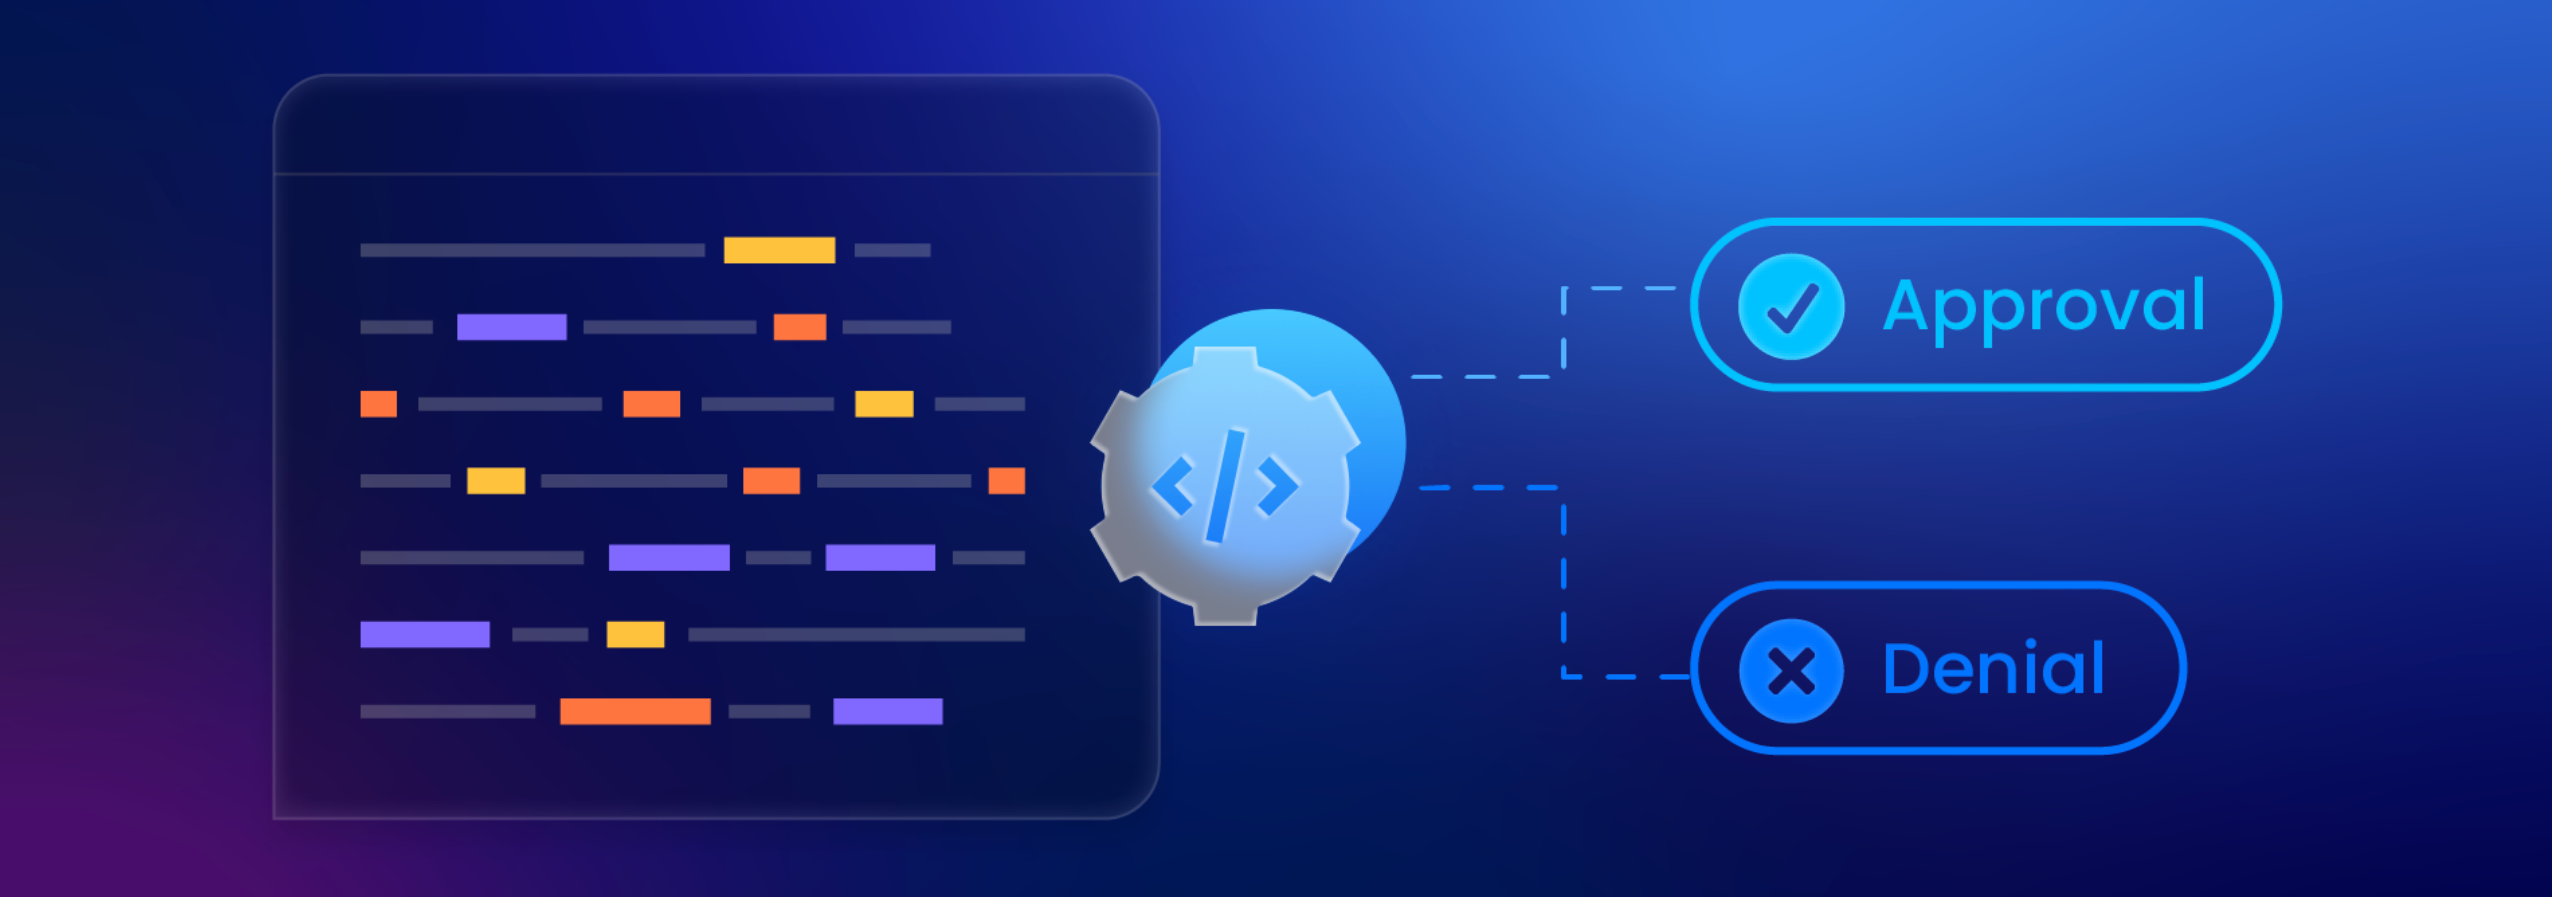

#**Data Description**

In today's dynamic financial sector, accessibility to housing loans stands as a pivotal gateway to fulfilling the aspiration of homeownership. The lending landscape has rapidly evolved, with an increasing reliance on data-driven assessments to gauge loan eligibility. Across urban, semi-urban, and rural areas, customers seeking home loans now expect an efficient lending process aligned with their unique needs.

As the industry progresses towards digitization and real-time decision-making, Company X is positioning itself to stay ahead by embracing this trend. Company X deals in all home loans. They have a presence across all urban, semi-urban, and rural areas. Customer-first applies for a home loan after that company validates the customer eligibility for a loan.

The company wants to automate the loan eligibility process (real-time) based on customer detail provided while filling out the online application form, or in simpler terms: **the company aims to create an automated model that accurately predicts loan approval status for new applicants**. This dataset contains the loan history of the company's previous customers. The detail of each column of the dataset is as follows:

**Attribute information:**

1. 🆔 Loan_ID: Unique Loan ID

2. ⚥ Gender: Male/Female

3. 💍 Married: Applicant married status (Y/N)

4. 👪 Dependents: Number of dependents

5. 🎓 Education: Education background (Graduate/ Under Graduate)

6. 🏠👨‍💻 Self_Employed: Self-employed (Y/N)

7. 💰 ApplicantIncome: Applicant's income

8. 💰💰CoapplicantIncome: Coapplicant's income

9. 💲 LoanAmount: Loan amount in thousands

10. 💲 Loan_Amount_Term: Term of a loan in months

11. 💳 Credit_History: Has credit history or not (0/1)

12. 📍 Property_Area: Urban/Semi-Urban/Rural

13. 📜 Loan_Status: Loan approved or not (Y/N)

**Study questions:**
1. Which customer details or features are most influential in accurately predicting loan approval status for new applicants?
2. Which machine learning algorithms and features will be most effective in predicting loan approval status accurately based on our dataset features?

#**Data Importing**

In [ ]:
import pandas as pd
import sys
import numpy as np
import scipy as sp
import matplotlib.pyplot as plt
from math import radians, cos, sin, asin, sqrt
import datetime
from sklearn.linear_model import LinearRegression
import seaborn as sns
sns.set(style="ticks")
%matplotlib inline

In [ ]:
df = pd.read_csv(company-x-loan.csv)
df.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [ ]:
# Drop Loan_ID since it has no use for our objective
df.drop(['Loan_ID'], axis = 1,  inplace=True)

# **1. Data Preprocessing and Cleaning**

## **1.1. Handle missing values**

###**1.1.1. Count missing value in each column.**

In [ ]:
missing_data = df.isnull()
missing_data.columns.values.tolist()

['ApplicantIncome',
 'CoapplicantIncome',
 'LoanAmount',
 'Loan_Amount_Term',
 'Credit_History',
 'not-self-employed',
 'self-employed',
 'loan-not-approved',
 'loan-approved',
 'Female',
 'Male',
 'graduate',
 'not-graduate',
 'rural',
 'semiurban',
 'urban',
 'not-married',
 'married',
 'dependent=0',
 'dependent=1',
 'dependent=2',
 'dependent=3+']

In [ ]:
missing_data.head()
#all the False mean it dont have missing data and True is it does have missing data

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,not-self-employed,self-employed,loan-not-approved,loan-approved,Female,...,not-graduate,rural,semiurban,urban,not-married,married,dependent=0,dependent=1,dependent=2,dependent=3+
0,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


In [ ]:
for column in missing_data.columns.values.tolist():
    print(column)
    print (missing_data[column].value_counts())
    print("")

ApplicantIncome
False    614
Name: ApplicantIncome, dtype: int64

CoapplicantIncome
False    614
Name: CoapplicantIncome, dtype: int64

LoanAmount
False    614
Name: LoanAmount, dtype: int64

Loan_Amount_Term
False    614
Name: Loan_Amount_Term, dtype: int64

Credit_History
False    614
Name: Credit_History, dtype: int64

not-self-employed
False    614
Name: not-self-employed, dtype: int64

self-employed
False    614
Name: self-employed, dtype: int64

loan-not-approved
False    614
Name: loan-not-approved, dtype: int64

loan-approved
False    614
Name: loan-approved, dtype: int64

Female
False    614
Name: Female, dtype: int64

Male
False    614
Name: Male, dtype: int64

graduate
False    614
Name: graduate, dtype: int64

not-graduate
False    614
Name: not-graduate, dtype: int64

rural
False    614
Name: rural, dtype: int64

semiurban
False    614
Name: semiurban, dtype: int64

urban
False    614
Name: urban, dtype: int64

not-married
False    614
Name: not-married, dtype: int64

marr

So we can conclude that, with 614 rows of data each:

These are **categorical variables with missing values:**
1. "Gender": 13 missing data
2. "Married": 3 missing data
3. "Dependents": 15 missing data
4. "Self_Employed" : 32 missing data
5. "Loan_Amount_Term": 14 missing data
6. "Credit_History": 50 missing data

Only one is a **numerical variable has missing values:**
7. "Loan_Amount": 22 missing data

"Education", "Property_Area", "Loan_Status", and "ApplicantIncome", "CoapplicantIncome" don't have any missing values.

###**1.1.2. Handle missing values in categorical data**

**clean gender data:** replace missing values based on frequency.

In [ ]:
df['Gender'].value_counts().idxmax()

'Male'

In [ ]:
df["Gender"].replace(np.nan, "Male", inplace=True)

**clean married data:** replace missing values based on frequency.

In [ ]:
df['Married'].value_counts().idxmax()

'Yes'

In [ ]:
## replace missing values for martial status data ##
df["Married"].replace(np.nan, "Yes", inplace=True)

**clean dependents data:** replace missing data with frequency.

In [ ]:
df['Dependents'].value_counts().idxmax()

'0'

In [ ]:
## replace missing values for dependents ##
df['Dependents'].replace(np.nan, '0', inplace = True)

**clean self_employed data:** replace with frequency.

In [ ]:
df['Self_Employed'].value_counts().idxmax()

'No'

In [ ]:
## clean self-employment status data ##
df['Self_Employed'].replace(np.nan, "No", inplace = True)

**clean Loan_Amount_Term data**: There are a lot of values for this variable, but they still follow a similar pattern to other categorical data so we can safely replace missing values based on frequency.


In [ ]:
df['Loan_Amount_Term'].value_counts().idxmax()

360.0

In [ ]:
## clean Loan_Amount_Term data ##
df['Loan_Amount_Term'].replace(np.nan, 360, inplace = True)

**clean Credit_History data:** replace with frequency.

In [ ]:
df['Credit_History'].value_counts().idxmax()

1.0

In [ ]:
## replace missing values with mode
df['Credit_History'].replace(np.nan, 1, inplace = True)

###**1.1.3. Handle missing values in numerical data**

**clean LoanAmount data:** replace with mean value.

In [ ]:
avg_loan_amount = df["LoanAmount"].astype("float").mean(axis=0)
print("Average of loan amount:", avg_loan_amount)

Average of loan amount: 146.41216216216216


In [ ]:
df["LoanAmount"].replace(np.nan, avg_loan_amount, inplace=True)

In [ ]:
df.head()

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,Male,No,0,Graduate,No,5849,0.0,146.412162,360.0,1.0,Urban,Y
1,Male,Yes,1,Graduate,No,4583,1508.0,128.000000,360.0,1.0,Rural,N
2,Male,Yes,0,Graduate,Yes,3000,0.0,66.000000,360.0,1.0,Urban,Y
3,Male,Yes,0,Not Graduate,No,2583,2358.0,120.000000,360.0,1.0,Urban,Y
4,Male,No,0,Graduate,No,6000,0.0,141.000000,360.0,1.0,Urban,Y


## **1.2. Correct data format**

In [ ]:
df.dtypes

Gender                object
Married               object
Dependents            object
Education             object
Self_Employed         object
ApplicantIncome        int64
CoapplicantIncome    float64
LoanAmount           float64
Loan_Amount_Term     float64
Credit_History       float64
Property_Area         object
Loan_Status           object
dtype: object

All are in their suitable data format.

##**1.3. Dummy variable**

We turn categorical variables into dummy variables in order to achieve better accuracy in later model performance. There are 7 categorical variables:

1. ⚥ Gender: Male/Female

2. 💍 Married: Applicant married status (Y/N)

3. 🎓 Education: Education background (Graduate/ Under Graduate)

4. 🏠👨‍💻 Self_Employed: Self-employed (Y/N)

5. 💳 Credit_History: Has credit history or not (0/1)

6. 📍 Property_Area: Urban/Semi-Urban/Rural

7. 📜 Loan_Status: Loan approved or not (Y/N)

In [ ]:
df.columns

Index(['Gender', 'Married', 'Dependents', 'Education', 'Self_Employed',
       'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History', 'Property_Area', 'Loan_Status'],
      dtype='object')

In [ ]:
dummy_variable_1 = pd.get_dummies(df["Self_Employed"])
dummy_variable_1.head()

,No,Yes
0,1,0
1,1,0
2,0,1
3,1,0
4,1,0


In [ ]:
dummy_variable_1.rename(columns={"Yes":"self-employed", "No":"not-self-employed"}, inplace=True)
dummy_variable_1.head()

,not-self-employed,self-employed
0,1,0
1,1,0
2,0,1
3,1,0
4,1,0


In [ ]:
dummy_variable_2 = pd.get_dummies(df["Loan_Status"])
dummy_variable_2.head()

,N,Y
0,0,1
1,1,0
2,0,1
3,0,1
4,0,1


In [ ]:
dummy_variable_2.rename(columns={"Y":"loan-approved", "N":"loan-not-approved"}, inplace=True)
dummy_variable_2.head()

,loan-not-approved,loan-approved
0,0,1
1,1,0
2,0,1
3,0,1
4,0,1


In [ ]:
dummy_variable_3 = pd.get_dummies(df["Gender"])
dummy_variable_3.head()

,Female,Male
0,0,1
1,0,1
2,0,1
3,0,1
4,0,1


In [ ]:
dummy_variable_3.rename(columns={"1":"Male", "0":"Female"}, inplace=True)
dummy_variable_3.head()

,Female,Male
0,0,1
1,0,1
2,0,1
3,0,1
4,0,1


In [ ]:
dummy_variable_4 = pd.get_dummies(df["Education"])
dummy_variable_4.head()

,Graduate,Not Graduate
0,1,0
1,1,0
2,1,0
3,0,1
4,1,0


In [ ]:
dummy_variable_4.rename(columns={"Graduate":"graduate", "Not Graduate":"not-graduate"}, inplace=True)
dummy_variable_4.head()

,graduate,not-graduate
0,1,0
1,1,0
2,1,0
3,0,1
4,1,0


In [ ]:
dummy_variable_5 = pd.get_dummies(df['Property_Area'])
dummy_variable_5.head()

,Rural,Semiurban,Urban
0,0,0,1
1,1,0,0
2,0,0,1
3,0,0,1
4,0,0,1


In [ ]:
dummy_variable_5.rename(columns={"Rural":"rural", "Semiurban":"semiurban", "Urban":"urban"}, inplace=True)
dummy_variable_5.head()

,rural,semiurban,urban
0,0,0,1
1,1,0,0
2,0,0,1
3,0,0,1
4,0,0,1


In [ ]:
dummy_variable_6 = pd.get_dummies(df['Married'])
dummy_variable_6.head()

,No,Yes
0,1,0
1,0,1
2,0,1
3,0,1
4,1,0


In [ ]:
dummy_variable_6.rename(columns={"Yes":"married", "No":"not-married"}, inplace=True)
dummy_variable_6.head()

,not-married,married
0,1,0
1,0,1
2,0,1
3,0,1
4,1,0


In [ ]:
dummy_variable_7 = pd.get_dummies(df['Dependents'])
dummy_variable_7.head()

,0,1,2,3+
0,1,0,0,0
1,0,1,0,0
2,1,0,0,0
3,1,0,0,0
4,1,0,0,0


In [ ]:
dummy_variable_7.rename(columns={"0":"dependent=0", "1":"dependent=1", "2":"dependent=2", "3+":"dependent=3+"}, inplace=True)
dummy_variable_7.head()

,dependent=0,dependent=1,dependent=2,dependent=3+
0,1,0,0,0
1,0,1,0,0
2,1,0,0,0
3,1,0,0,0
4,1,0,0,0


In [ ]:
# merge data frame "df" and "dummy_variable_1"
df = pd.concat([df, dummy_variable_1], axis=1)

# drop original column "fuel-type" from "df"
df.drop("Self_Employed", axis = 1, inplace=True)

In [ ]:
# merge data frame "df" and "dummy_variable_2"
df = pd.concat([df, dummy_variable_2], axis=1)

# drop original column "fuel-type" from "df"
df.drop("Loan_Status", axis = 1, inplace=True)

In [ ]:
# merge data frame "df" and "dummy_variable_3"
df = pd.concat([df, dummy_variable_3], axis=1)

# drop original column "fuel-type" from "df"
df.drop("Gender", axis = 1, inplace=True)

In [ ]:
# merge data frame "df" and "dummy_variable_4"
df = pd.concat([df, dummy_variable_4], axis=1)

# drop original column "fuel-type" from "df"
df.drop("Education", axis = 1, inplace=True)

In [ ]:
# merge data frame "df" and "dummy_variable_5"
df = pd.concat([df, dummy_variable_5], axis=1)

# drop original column "fuel-type" from "df"
df.drop("Property_Area", axis = 1, inplace=True)

In [ ]:
# merge data frame "df" and "dummy_variable_6"
df = pd.concat([df, dummy_variable_6], axis=1)

# drop original column "fuel-type" from "df"
df.drop("Married", axis = 1, inplace=True)

In [ ]:
# merge data frame "df" and "dummy_variable_7"
df = pd.concat([df, dummy_variable_7], axis=1)

# drop original column "fuel-type" from "df"
df.drop("Dependents", axis = 1, inplace=True)

In [ ]:
df.head()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,not-self-employed,self-employed,loan-not-approved,loan-approved,Female,...,not-graduate,rural,semiurban,urban,not-married,married,dependent=0,dependent=1,dependent=2,dependent=3+
0,5849,0.0,146.412162,360.0,1.0,1,0,0,1,0,...,0,0,0,1,1,0,1,0,0,0
1,4583,1508.0,128.000000,360.0,1.0,1,0,1,0,0,...,0,1,0,0,0,1,0,1,0,0
2,3000,0.0,66.000000,360.0,1.0,0,1,0,1,0,...,0,0,0,1,0,1,1,0,0,0
3,2583,2358.0,120.000000,360.0,1.0,1,0,0,1,0,...,1,0,0,1,0,1,1,0,0,0
4,6000,0.0,141.000000,360.0,1.0,1,0,0,1,0,...,0,0,0,1,1,0,1,0,0,0


**We have a clean <a href = "https://drive.google.com/file/d/1-Myp2QtHCh8Tq_ZZa7FFJK8QMV_Hzxhr/view?usp=sharing"> dataset</a>**

In [ ]:
df.to_csv('/content/drive/MyDrive/PAMS/BUSINESS ANALYTICS - PAMS FALL 2023/[PAMS_GROUP 2] PRESENTATION/company_x_loan_clean.csv', index=False)

#**2. Exploratory Data Analysis**

For this part, we will try to get insight of the data and see how they influence the decision whether to approve or disapprove loans. Here, the questions are

- Who does the data represent?
- What are their characteristics?
- What is the connection between these characteristics and our outcome variable?

##**2.1. Categorical variable**

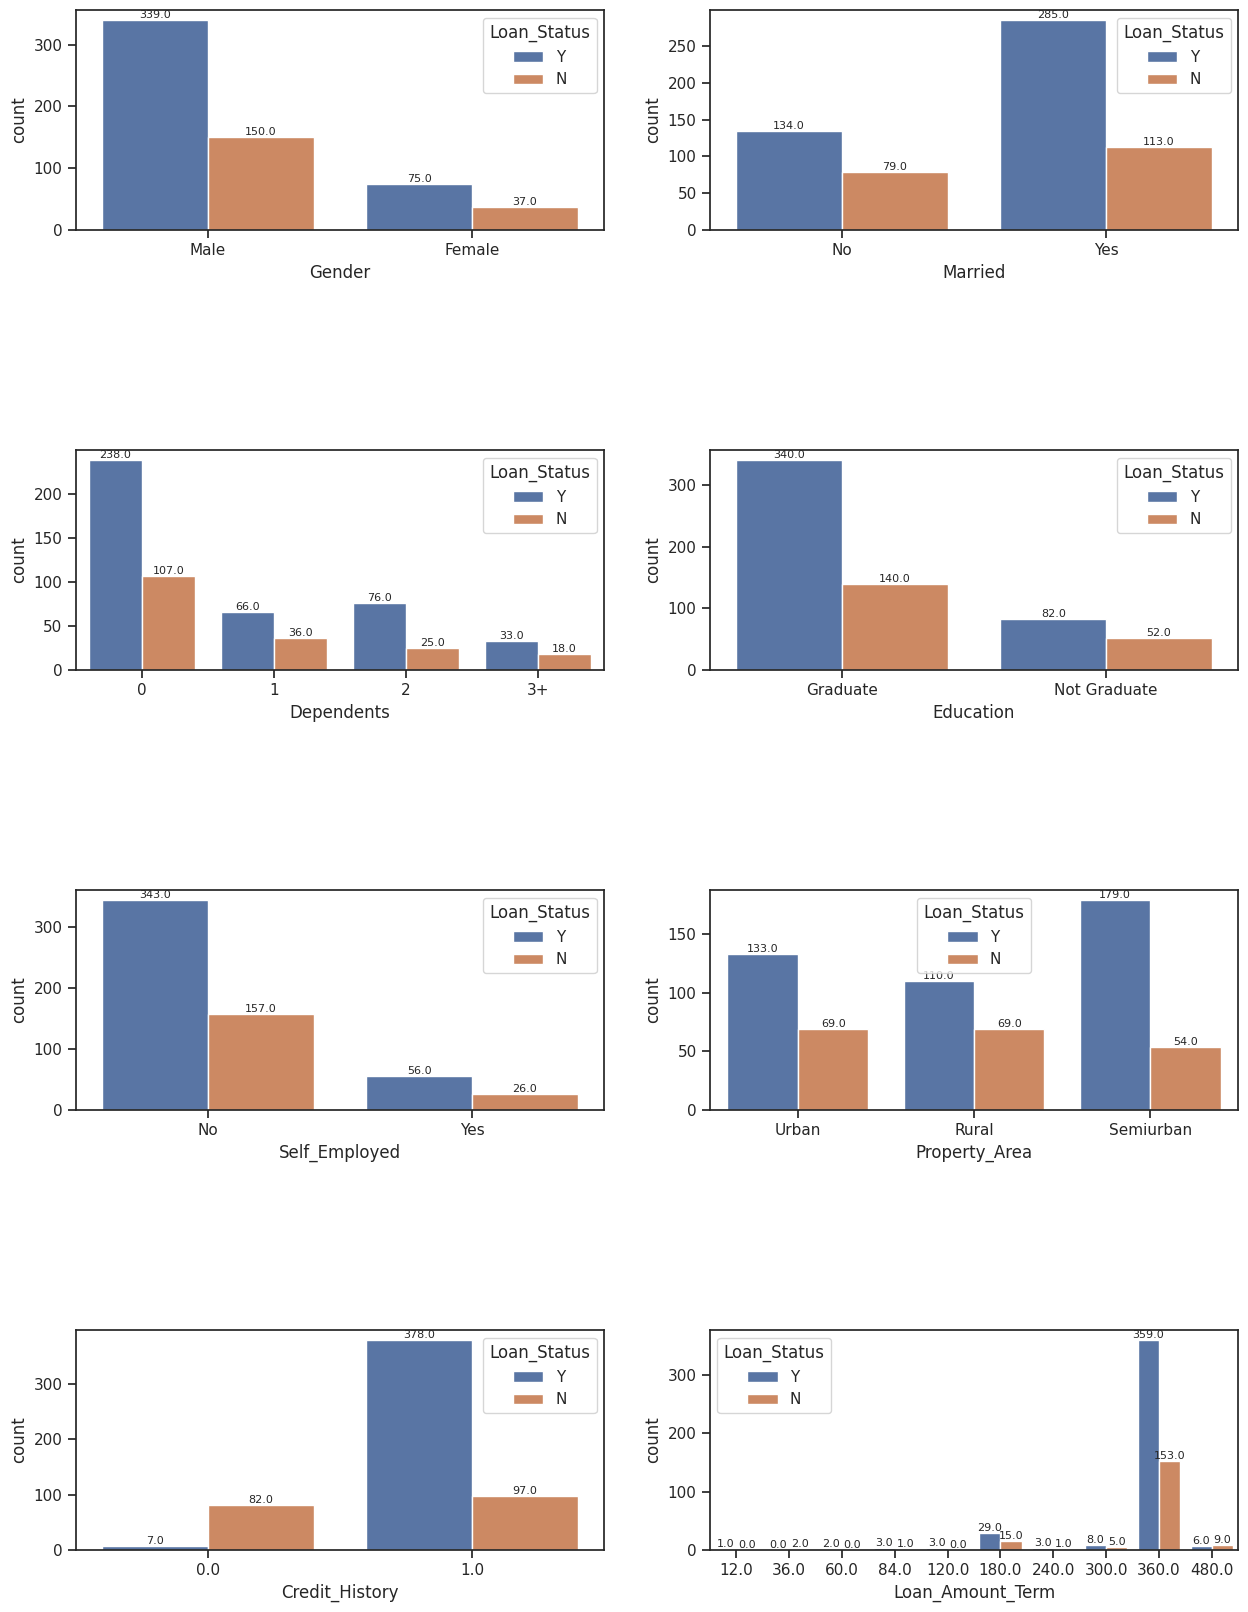

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

categorical_columns = ['Gender', 'Married', 'Dependents', 'Education', 'Self_Employed', 'Property_Area','Credit_History','Loan_Amount_Term']
fig, axes = plt.subplots(4, 2, figsize=(15, 20))

for idx, cat_col in enumerate(categorical_columns):
    row, col = idx // 2, idx % 2
    ax = sns.countplot(x=cat_col, data=df, hue='Loan_Status', ax=axes[row, col])

    # Add count annotations to the bars
    for p in ax.patches:
        height = p.get_height()  # Get the height of the bar
        ax.annotate(f'{height}',  # Display count/percentage
                    (p.get_x() + p.get_width() / 2, height),  # Positioning
                    ha='center', va='bottom', fontsize=8)  # Alignment and font size

plt.subplots_adjust(hspace=1)
plt.show()

1. **"Gender"**: Male ask for loan more than female, the ratio of status loan between two groups don't look that different: around 30% male and female get the loan.
  
  *→ Gender does not affect approval status.*

2. **"Married"**: Those who have married ask for loan more than those who haven’t. Those who havent married (63%) seem to be approved for a loan less than those who have married (71%), which is not too different.
  
  *→ Marital status does not neccessarily affect approval status.*

3. **"Dependents"**: The less dependents they have, the more likely they ask for loan. Those with 0 dependents have around 45% of being approved for loan, those with 1 - 55%, those with 2 - 33%, those with +3 - 55%. We don't see any specific pattern.
  
  *→ Dependent number does not neccessarily affect approval status.**

4. **"Education"**: Those who graduated ask for loan more than those who haven't or didn't graduate. And the ratio of getting a yes for loan on the graduate side (71%) is higher than who did not graduate (61%).

  *→ We can consider education background an important factor.*

5. **"Self_Employed"**: Those who self employed ask for loan less than those who aren't self-employed. The ratio of those who self employed (69%) is quite similar to those who dont (68%).

  *→ Being self_employed or not does not affect approval status.*

6. **"Property_Area":** People from semiurban ask for loan more than those in the urban and more than those in the rural. The possibility of getting approval also follow the same pattern: 77% - 66% - 61% of people from semiurban, urban and rural, respectively, get approved for loan.

  *→ We can consider property area an important factor.*

7. **"Credit_History":** The amount of applicants with credit history is larger than the amount of applicants with no credit history. Applicants with no credit history tend to be disapproved (only 7% approved), while applicants with credit history have 80% of getting approved.

  *→ We can consider property area an important factor.*

8. **"Loan_Amount_Term"**: Most people ask for a 360-month loan, 87% of them get approval for loan. Less people ask for 180-month loan (66% get approved). Much lesser ask for 300-month loan (61% get approved) and 480 month loan (40%), the least asked is 240-month loan (75%). We don't see any specific pattern.

  *→ Loan amount term does not neccessarily affect approval status.*

**CONLUSION: There are 3 notable categorical factors affecting approval status: "Education", "Property_Area", "Credit_History".**


##**2.2. Descriptive Statistical Analysis**

In [ ]:
df = pd.read_csv("/content/drive/MyDrive/PAMS/BUSINESS ANALYTICS - PAMS FALL 2023/[PAMS_GROUP 2] PRESENTATION/company_x_loan_clean.csv")
df.head()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,not-self-employed,self-employed,loan-not-approved,loan-approved,Female,...,not-graduate,rural,semiurban,urban,not-married,married,dependent=0,dependent=1,dependent=2,dependent=3+
0,5849,0.0,146.412162,360.0,1.0,1,0,0,1,0,...,0,0,0,1,1,0,1,0,0,0
1,4583,1508.0,128.000000,360.0,1.0,1,0,1,0,0,...,0,1,0,0,0,1,0,1,0,0
2,3000,0.0,66.000000,360.0,1.0,0,1,0,1,0,...,0,0,0,1,0,1,1,0,0,0
3,2583,2358.0,120.000000,360.0,1.0,1,0,0,1,0,...,1,0,0,1,0,1,1,0,0,0
4,6000,0.0,141.000000,360.0,1.0,1,0,0,1,0,...,0,0,0,1,1,0,1,0,0,0


In [ ]:
df.describe()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,not-self-employed,self-employed,loan-not-approved,loan-approved,Female,...,not-graduate,rural,semiurban,urban,not-married,married,dependent=0,dependent=1,dependent=2,dependent=3+
count,614.000000,614.000000,614.000000,614.000000,614.000000,614.000000,614.000000,614.000000,614.000000,614.000000,...,614.000000,614.000000,614.000000,614.000000,614.000000,614.000000,614.000000,614.000000,614.000000,614.000000
mean,5403.459283,1621.245798,146.412162,342.410423,0.855049,0.866450,0.133550,0.312704,0.687296,0.182410,...,0.218241,0.291531,0.379479,0.328990,0.346906,0.653094,0.586319,0.166124,0.164495,0.083062
std,6109.041673,2926.248369,84.037468,64.428629,0.352339,0.340446,0.340446,0.463973,0.463973,0.386497,...,0.413389,0.454838,0.485653,0.470229,0.476373,0.476373,0.492894,0.372495,0.371027,0.276201
min,150.000000,0.000000,9.000000,12.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,2877.500000,0.000000,100.250000,360.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,3812.500000,1188.500000,129.000000,360.000000,1.000000,1.000000,0.000000,0.000000,1.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,0.000000,0.000000,0.000000
75%,5795.000000,2297.250000,164.750000,360.000000,1.000000,1.000000,0.000000,1.000000,1.000000,0.000000,...,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000
max,81000.000000,41667.000000,700.000000,480.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


**There seem to be a lot of variance in the numerical variable: "ApplicantIncome", "CoapplicantIncome", "LoanAmount".**

       ApplicantIncome  CoapplicantIncome  LoanAmount
count       614.000000         614.000000  592.000000
mean       5403.459283        1621.245798  146.412162
std        6109.041673        2926.248369   85.587325
min         150.000000           0.000000    9.000000
25%        2877.500000           0.000000  100.000000
50%        3812.500000        1188.500000  128.000000
75%        5795.000000        2297.250000  168.000000
max       81000.000000       41667.000000  700.000000


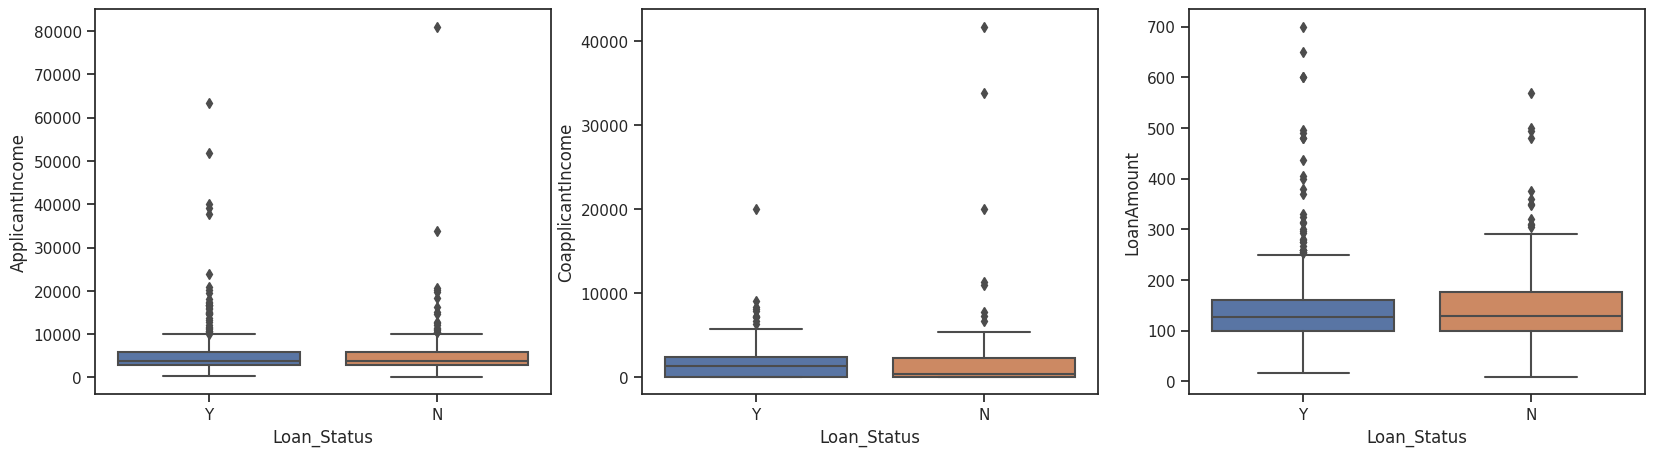

In [ ]:
## visualizing numerical variables ##
numerical_columns = ['ApplicantIncome', 'CoapplicantIncome', 'LoanAmount']
fig,axes = plt.subplots(1,3,figsize=(20,5))
for idx,cat_col in enumerate(numerical_columns):
    sns.boxplot(y=cat_col,data=df,x='Loan_Status',ax=axes[idx])

print(df[numerical_columns].describe())
plt.subplots_adjust(hspace=1)

1. **"ApplicantIncome":** The mean value for applicant income with loan status "Y" and that of status "N" is almost the same.

  *→ Applicant income does not affect approval.*

2. **"CoapplicantIncome":** The mean value for coapplicant income with loan status "Y" is higher than those of status "N", implying that if the coapplicant income is higher, the higher possibility it is to get approved for a loan.
  
  *→ We can consider coapplicant income as a factor.*

3. **"LoanAmount":** The mean value for loan amount with loan status "Y" and that of status "N" is almost the same.

  *→ Loan Amount does not affect affect approval.*

**CONLUSION: There are 3 notable categorical factors: "Education", "Property_Area", "Credit_History", and 1 numerical factor: "CoapplicantIncome" affecting approval status.**

- Applicants with higher education background loan more and has higher loan approval rate than those from lower education background.
- Applicants from semiurban ask for loan more and has higher loan approval rate than those from urban and rural.
- Applicants with credit history loan more and has higher loan approval rate than those without credit history.
- Applicants with higher coapplicant income has higher loan approval rate than those with lower coapplicant income.

#**3. Model Development and Evaluation**

First of all, we need to specify what data we will use. Looking from our exploratory data analysis results, the variables that seem to have a relationship with the data is:

- Credit History
- Property Area
- Educational Background
- Coapplicant Income


Moreover, from these articles: https://www.propertyguru.com.my/property-guides/5-things-banks-look-for-when-applying-for-a-home-loan-3487 The factors that decide whether a home loan is approved is:

- Property Value
- Income
- Existing Liabilities
- Risk Profile
- Age and the loan's tenure

From our data set, we can access the data: Property Value - represented by Loan Amount; Income - Applicant Income, Existing Liabilities and Risk Profile - Credit History, Loan Amount

So the final list for our variables are:
1. 🎓 Education Background
2. 💰 Applicant Income
3. 💰 Coapplicant Income
4. 💲 Loan Amount
5. 💲 Loan Amount Term
6. 💳 Credit History
7. 📍 Property Area

For the type of model we will be using, because our objective data - Loan approval status, is a categorical data with only two values = Yes or No, we cannot use linear models because linear regression model predicts continuous variable - if we force our dataset to this model, the outcome will be continuous, not categorical, which mean we get the fundamentally wrong kind of data. For this problem, the outcome can only be 0 (no) or 1 (yes) and any other values will not make sense. For this kind of variable, we will need a model that fits categorical results. We will be using **logistic regression and decision tree model** and later evaluate them.

##**3.1. Logistic Regression Model**

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
logm = LogisticRegression(max_iter = 300)

## model with only chosen variables
X = df[['graduate', 'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount', 'Credit_History', 'semiurban', "urban", "Loan_Amount_Term"]]
Y = df['loan-approved']
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.3, random_state=0)
Y_predict = logm.fit(X_train, Y_train).predict(X_test)

To assess the performance of logistic regression, we use these metrics:

- Accuracy
- Precision
- Recall
- ROC curve
- AUC curve

In [ ]:
## Accuracy
print(accuracy_score(Y_test, Y_predict))

## Precision and Recall
print(precision_score(Y_test, Y_predict))
print(recall_score(Y_test, Y_predict))

## AUC
print(roc_auc_score(Y_test, Y_predict))

0.8324324324324325
0.8198757763975155
0.9850746268656716
0.7082235879426397


In [ ]:
accuracy_score(Y_train, logm.fit(X_train, Y_train).predict(X_train))

0.8065268065268065

**From this, we can also see that there is a low chance of overfitting, because the model did not try to fit the train set too much.**

##**3.2. Decision Tree**

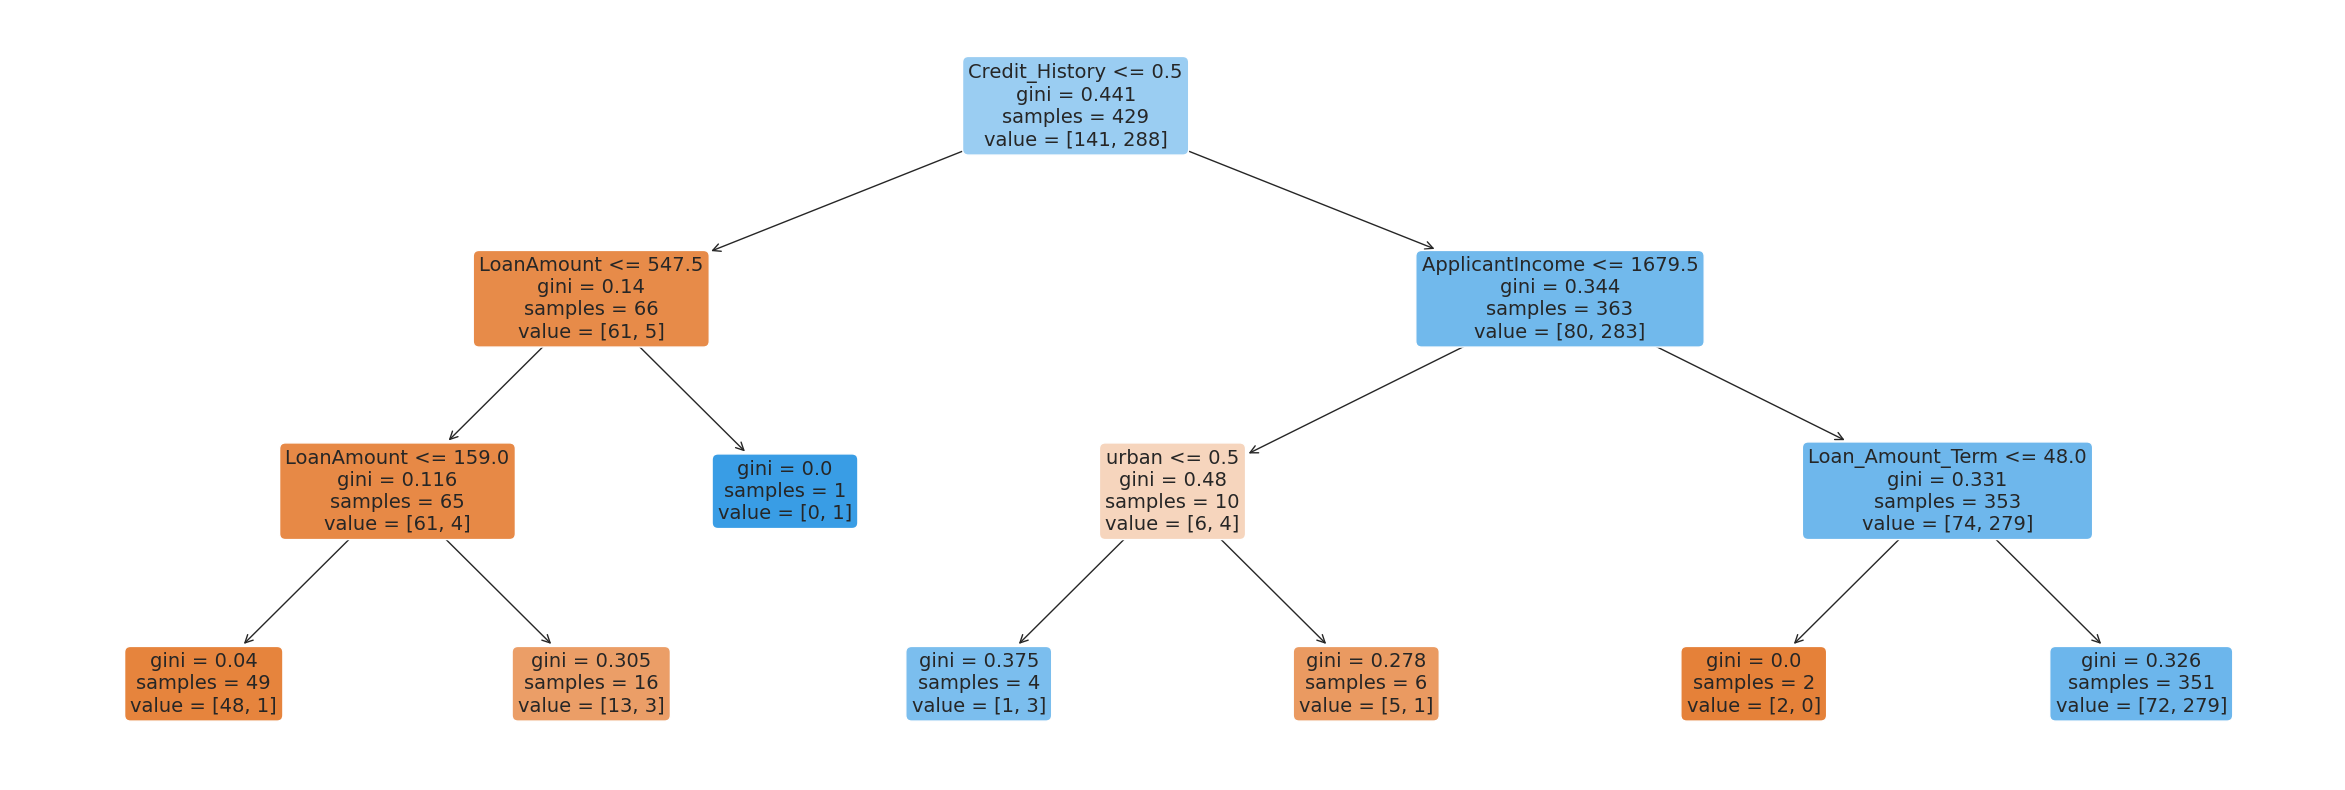

In [ ]:
## Decision tree for set 2
from sklearn.tree import DecisionTreeClassifier
clf = DecisionTreeClassifier(max_depth=3)
clf.fit(X_train, Y_train)

## Visualize tree for set 1
from sklearn import tree
import matplotlib.pyplot as plt

plt.figure(figsize=(30,10))
a = tree.plot_tree(clf,
                   feature_names = X_train.columns.tolist(),
                   rounded = True,
                   filled = True,
                   fontsize=14)

plt.show()

The way we navigate this decision tree is:

- Is an applicant's credit history lower than 0.5?
- If yes, is their loan amount lower than 547.5?
- If yes, is their loan amount lower than 159?
- If yes, their loan is not approved.

We can see that the lower the loan, the lower chance of getting approval.  Usually, it would be the higher amount of the loan, the lower the chance of loan approval.


In [ ]:
## Accuracy
print(accuracy_score(Y_test, clf.fit(X_train, Y_train).predict(X_test)))

## Precision and Recall
print(precision_score(Y_test, clf.fit(X_train, Y_train).predict(X_test)))
print(recall_score(Y_test, clf.fit(X_train, Y_train).predict(X_test)))

## AUC
print(roc_auc_score(Y_test, clf.fit(X_train, Y_train).predict(X_test)))

0.8108108108108109
0.8113207547169812
0.9626865671641791
0.6872256365232661


In [ ]:
accuracy_score(Y_train, clf.fit(X_train, Y_train).predict(X_train))

0.8181818181818182

**This model also does not seem to be overfitting.**

In [ ]:
dfFeatures = pd.DataFrame({'Features':X_train.columns.tolist(),'Importances':clf.feature_importances_})
dfFeatures.sort_values(by='Importances',ascending=False).head(7)

,Features,Importances
4,Credit_History,0.853231
1,ApplicantIncome,0.045701
7,Loan_Amount_Term,0.038749
3,LoanAmount,0.037134
6,urban,0.025185
0,graduate,0.000000
2,CoapplicantIncome,0.000000


**'Credit_History' plays a substantially dominant role in the decision-making process.**

#**4. Conclusion**

Although the training accuracy score of decision tree is slightly higher:
- Logistic regression: 80,65%
- Decision tree: 81,82%

, the testing accuracy score of logistic regression model is better:
- Logistic regression: 83,24%
- Decision tree: 81,08%

We prioritize test accuracy score.

**We have selected the best performing model - a logistic regression model using 7 independent variables**:

1. 🎓 Education Background
2. 💰 Applicant Income
3. 💰 Coapplicant Income
4. 💲 Loan Amount
5. 💲 Loan Amount Term
6. 💳 Credit History
7. 📍 Property Area

**Of these criterias, credit history, income, loan amount term, loan amount are the most important ones to focus on. If you want to apply for a home loan in the future, pay attention to these factors first.**

**Recommendations for company X:**
- Enhance loan approval processes: Emphasize the assessment of critical factors such as credit history and financial stability in loan approval decisions.
- Customer Guidance: provide guidance to applicants, offer guidance to loan applicants on factors like credit history management and financial stability to improve their loan approval prospects.